<a href="https://colab.research.google.com/github/head1ton/kaggle_dev/blob/master/Deep_Neural_Network_Keras_way.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten
from keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

from subprocess import check_output
print(check_output(["ls", "./"]).decode("utf8"))

sample_data
sample_submission.csv
test.csv
train.csv



In [3]:
train = pd.read_csv("./train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
test = pd.read_csv('./test.csv')
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X_train = (train.iloc[:, 1:].values).astype('float32')
y_train = train.iloc[:, 0].values.astype('int32')
X_test = test.values.astype('float32')

In [6]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

In [8]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

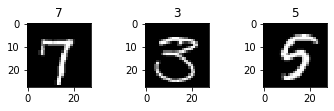

In [9]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(6, 9):
    plt.subplot(330 + (i + 1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i])

In [10]:
X_train.shape

(42000, 28, 28)

In [12]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_train.shape

(42000, 28, 28, 1)

In [13]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_test.shape

(28000, 28, 28, 1)

In [0]:
# Standardization
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x):
    return (x - mean_px) / std_px

In [15]:
# one hot encoding of labels
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

In [17]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


([<matplotlib.axis.XTick at 0x7feaa425a6d8>,
 <a list of 10 Text xticklabel objects>)

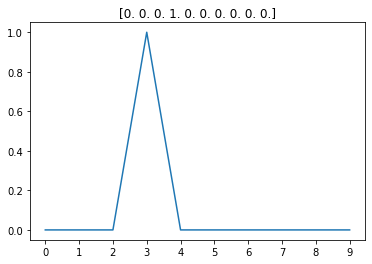

In [18]:
plt.title(y_train[9])
plt.plot(y_train[9])
plt.xticks(range(10))

In [0]:
seed = 43
np.random.seed(seed)

In [0]:
# Linear Model
from keras.models import Sequential
from keras.layers.core import Lambda, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D, MaxPooling2D

In [21]:
model = Sequential()
model.add(Lambda(standardize, input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
print("input shape ", model.input_shape)
print("output shape", model.output_shape)




input shape  (None, 28, 28, 1)
output shape (None, 10)


In [22]:
# Compile network
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Data Augumentation
from keras.preprocessing import image
gen = image.ImageDataGenerator()

In [26]:
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
# Cross Validation
from sklearn.model_selection import train_test_split
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches = gen.flow(X_val, y_val, batch_size=64)

In [35]:
batches.n

37800

In [31]:
val_batches.n

4200

In [36]:
history = model.fit_generator(generator=batches, 
                              steps_per_epoch=batches.n, 
                              epochs=3, 
                              validation_data=val_batches, 
                              validation_steps=val_batches.n)

Epoch 1/3





37800/37800 [==============================] - 116s 3ms/step - loss: 0.2399 - acc: 0.9341 - val_loss: 0.3336 - val_acc: 0.9104
Epoch 2/3
37800/37800 [==============================] - 114s 3ms/step - loss: 0.2158 - acc: 0.9418 - val_loss: 0.3521 - val_acc: 0.9055
Epoch 3/3
37800/37800 [==============================] - 115s 3ms/step - loss: 0.2098 - acc: 0.9437 - val_loss: 0.3595 - val_acc: 0.9079


In [37]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [39]:
history_dict.items()

dict_items([('val_loss', [0.3336497544776244, 0.35206916585813947, 0.35950518747309024]), ('val_acc', [0.9104411720601592, 0.9055129010783387, 0.9078896172062146]), ('loss', [0.2399295058786989, 0.21576489339902652, 0.20984179856810262]), ('acc', [0.934049975516512, 0.9418393126574504, 0.9436563558897026])])

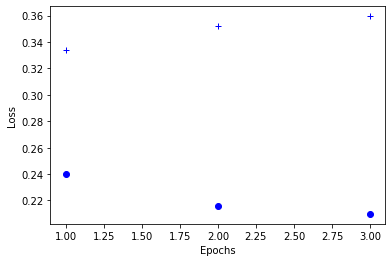

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

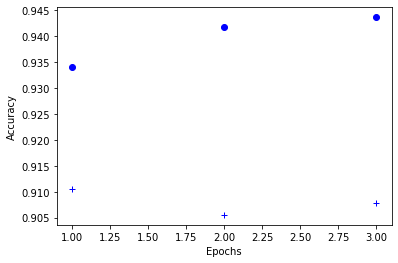

In [41]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [0]:
# Fully Connected Model
def get_fc_model():
    model = Sequential([
                        Lambda(standardize, input_shape=(28, 28, 1)),
                        Flatten(),
                        Dense(512, activation='relu'),
                        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [0]:
fc = get_fc_model()
fc.optimizer.lr = 0.01

In [44]:
history = fc.fit_generator(generator=batches, 
                           steps_per_epoch=batches.n,
                           epochs=1,
                           validation_data=val_batches,
                           validation_steps=val_batches.n)

Epoch 1/1
37800/37800 [==============================] - 370s 10ms/step - loss: 0.2022 - acc: 0.9728 - val_loss: 0.5926 - val_acc: 0.9555


In [0]:
# Convolutional Neural Network
from keras.layers import Convolution2D, MaxPooling2D

def get_cnn_model():
    model = Sequential([
                        Lambda(standardize, input_shape=(28, 28, 1)),
                        Convolution2D(32, (3, 3), activation='relu'),
                        Convolution2D(32, (3, 3), activation='relu'),
                        MaxPooling2D(),
                        Convolution2D(64, (3, 3), activation='relu'),
                        Convolution2D(64, (3, 3), activation='relu'),
                        MaxPooling2D(),
                        Flatten(),
                        Dense(512, activation='relu'),
                        Dense(10, activation='softmax')
    ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [48]:
model = get_cnn_model()
model.optimizer.lr = 0.01

In [49]:
history = model.fit_generator(generator=batches, 
                              steps_per_epoch=batches.n,
                              epochs=1,
                              validation_data=val_batches,
                              validation_steps=val_batches.n)

Epoch 1/1
37800/37800 [==============================] - 5567s 147ms/step - loss: 0.0712 - acc: 0.9810 - val_loss: 0.1299 - val_acc: 0.9755


In [0]:
# Data Augmentation
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3, height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches = gen.flow(X_val, y_val, batch_size=64)

In [0]:
model.optimizer.lr = 0.001
history = model.fit_generator(generator=batches, 
                              steps_per_epoch=batches.n, 
                              epochs=1, 
                              validation_data=val_batches, 
                              validation_steps=val_batches.n)

Epoch 1/1
22744/37800 [=================>............] - ETA: 39:43 - loss: 0.2359 - acc: 0.9277

In [0]:
# Adding Batch Normalization
from keras.layers.normalization import BatchNormalization

def get_bn_model():
    model = Sequential([
                        Lambda(standardize, input_shape=(28,28,1)),
                        Convolution2D(32, (3, 3), activation='relu'),
                        BatchNormalization(axis=1),
                        Convolution2D(32, (3, 3), activation='relu'),
                        MaxPooling2D(),
                        BatchNormalization(axis=1),
                        Convolution2D(64, (3, 3), activation='relu'),
                        BatchNormalization(axis=1),
                        Convolution2D(64, (3, 3), activation='relu'),
                        MaxPooling2D(),
                        Flatten(),
                        BatchNormalization(),
                        Dense(512, activation='relu'),
                        BatchNormalization(),
                        Dense(10, activation='softmax')
    ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [0]:
model = get_bn_model()
model.optimizer.lr = 0.01
history = model.fit_generator(generator=batches,
                              steps_per_epoch=batches.n,
                              epochs=1,
                              validation_data=val_batches,
                              validation_steps=val_batches.n)

In [0]:
# submitting Predictions to Kaggle
model.optimizer.lr = 0.01
gen = image.ImageDataGenerator()
batches = gen.flow(X, y, batch_size=64)
history = model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3)

In [0]:
predictions = model.predict_classes(X_test, verbose=0)

submissions = pd.DataFrame({
    "ImageId": list(range(1, len(predictions) + 1)),
    "Label": predictions
})
submission.to_csv("DR.csv", index=False, header=True)